# EDA AND SENTIMENT ANALYSYS ON IMDB DATA

## Agenda

1) Getting data from Imdb website and creating data frame

2) EDA And Data Cleaning

3) Sentiment Analysis Using Nltk 

4) Generate Analysis Report Movies Based on Reviews


# # Getting Data From Imdb Website

In [8]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as Bs
Moviename1=[]
years1=[]
Runtime1=[]
genres1=[]
Ratings1=[]
Reviews1=[]
for a in range(1,7):
    i=str(a)
    url='https://www.imdb.com/list/ls095374765/?sort=list_order,asc&st_dt=&mode=grid&page='+i+'&ref_=ttls_vw_grd'
    A=requests.get(url)
    soup=Bs(A.content,'html.parser')
    #print(soup)
    Movie=soup.find_all('div',class_='title') # Movie Names
    Moviename=[Movienames.text.replace('\n','').replace(' ','') for Movienames in Movie]
    Moviename1.extend(Moviename)
    year=soup.find_all('span',class_='lister-item-year text-muted unbold') #Movie Release Year
    years=[years.text.replace('\n','').replace('(','').replace(')','') for years in year]
    years1.extend(years)
    Runtime=soup.find_all('span',class_='runtime') # Movie Runtime
    Runtimes=[Runtime.text.replace('\n','').replace('(','').replace(')','') for Runtime in Runtime]
    Runtime1.extend(Runtimes)
    genre=soup.find_all('span',class_='genre') # Move Genre
    genres=[genre.text.replace('\n','').replace('(','').replace(')','') for genre in genre]
    genres1.extend(genres)
#print(years)
    Rating=soup.find_all('div',class_='ipl-rating-star small') # Movie Rating
    Ratings=[Ratings.text.replace('\n','').replace(' ','') for Ratings in Rating]
    Ratings1.extend(Ratings)
    Director=soup.find_all('p',class_='text-muted text-small')
    Review=soup.find_all('p',class_='')
    Reviews=[reviews.text.replace('\n','') for reviews in Review] #Movies Review
    Reviews1.extend(Reviews)
#print(Reviews1)
Data1=list(zip(Moviename1,years1,Runtime1,genres1,Ratings1,Reviews1))
df=pd.DataFrame(Data1,columns=['Moviename1','years1','Runtime1','genres1','Ratings1','Reviews1'])
df.head()
#B=df.to_csv('Imdbreview1.csv')



,Moviename1,years1,Runtime1,genres1,Ratings1,Reviews1
0,Aladdin,2019,128 min,"Adventure, Comedy, Family",6.9,A kind-hearted street urchin and a power-hungr...
1,ItChapterTwo,2019,169 min,"Drama, Fantasy, Horror",6.5,Twenty-seven years after their first encounter...
2,Joker,I 2019,122 min,"Crime, Drama, Thriller",8.4,A mentally troubled stand-up comedian embarks ...
3,DolemiteIsMyName,2019,118 min,"Biography, Comedy, Drama",7.2,Eddie Murphy portrays real-life legend Rudy Ra...
4,Anna,II 2019,118 min,"Action, Thriller",6.6,Beneath Anna Poliatova's striking beauty lies ...


In [9]:
df.shape

(494, 6)

# # Data Cleaning
### Removing Stop Words and Special Characters

In [10]:
import nltk
import string

In [11]:
A=string.punctuation
print(A)



!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
from nltk.corpus import stopwords

In [13]:
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:

df['Reviews1']=df['Reviews1'].apply(lambda x:' '.join([i for i in x.split() if i not in (stop_words) and i not in (A)]))
print(df['Reviews1'][0])


A kind-hearted street urchin power-hungry Grand Vizier vie magic lamp power make deepest wishes come true.


In [15]:
df.head()

,Moviename1,years1,Runtime1,genres1,Ratings1,Reviews1
0,Aladdin,2019,128 min,"Adventure, Comedy, Family",6.9,A kind-hearted street urchin power-hungry Gran...
1,ItChapterTwo,2019,169 min,"Drama, Fantasy, Horror",6.5,Twenty-seven years first encounter terrifying ...
2,Joker,I 2019,122 min,"Crime, Drama, Thriller",8.4,A mentally troubled stand-up comedian embarks ...
3,DolemiteIsMyName,2019,118 min,"Biography, Comedy, Drama",7.2,Eddie Murphy portrays real-life legend Rudy Ra...
4,Anna,II 2019,118 min,"Action, Thriller",6.6,Beneath Anna Poliatova's striking beauty lies ...


In [21]:
j=''
for i in df['Reviews1']:
    j=j+i
j

'A kind-hearted street urchin power-hungry Grand Vizier vie magic lamp power make deepest wishes come true.Twenty-seven years first encounter terrifying Pennywise, Losers Club grown moved away, devastating phone call brings back.A mentally troubled stand-up comedian embarks downward spiral leads creation iconic villain.Eddie Murphy portrays real-life legend Rudy Ray Moore, comedy rap pioneer proved naysayers wrong hilarious, obscene, kung-fu fighting alter ego, Dolemite, became 1970s Blaxploitation phenomenon.Beneath Anna Poliatova\'s striking beauty lies secret unleash indelible strength skill become one world\'s feared government assassins.Two con women one low rent high class team take men wronged them.As residents Deadwood gather commemorate Dakota\'s statehood 1889, saloon owner Al Swearengen Marshal Seth Bullock clash Senator George Hearst.A small-town teacher relocates one toughest classrooms country.In Colorado territory, outlaw Wes McQueen escapes jail pull railroad robbery bu

In [37]:
import seaborn as sns 
import matplotlib.pyplot as plt

## Wordcloud
- Displaying Most frequent words using wordcloud

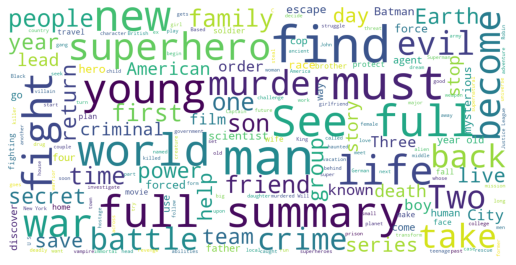

In [41]:

    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(j)

    fig = plt.figure(1, figsize=(9,9))
    plt.axis('off')
    

    plt.imshow(wordcloud)
    plt.show()


### Droping Duplicate and Null Values if Exist

In [40]:
df.drop_duplicates()
df.dropna()
df.head()

,Moviename1,years1,Runtime1,genres1,Ratings1,Reviews1
0,Aladdin,2019,128 min,"Adventure, Comedy, Family",6.9,A kind-hearted street urchin power-hungry Gran...
1,ItChapterTwo,2019,169 min,"Drama, Fantasy, Horror",6.5,Twenty-seven years first encounter terrifying ...
2,Joker,I 2019,122 min,"Crime, Drama, Thriller",8.4,A mentally troubled stand-up comedian embarks ...
3,DolemiteIsMyName,2019,118 min,"Biography, Comedy, Drama",7.2,Eddie Murphy portrays real-life legend Rudy Ra...
4,Anna,II 2019,118 min,"Action, Thriller",6.6,Beneath Anna Poliatova's striking beauty lies ...


In [41]:
Genres=[]
for i in genres1:
    for j in i.split():
        Genres.append(j)
df1=pd.Series(Genres)

In [42]:
df1.value_counts()

Action,         279
Adventure,      121
Comedy,          84
Sci-Fi           74
Drama            70
Drama,           67
Thriller         65
Comedy           61
Animation,       57
Crime,           51
Fantasy          47
Horror,          46
Crime            39
Biography,       39
Adventure        33
Horror           26
Documentary,     23
History          18
Fantasy,         18
Sci-Fi,          15
Mystery          15
Family           13
Romance          12
Western          11
War              10
Mystery,         10
Short,            9
Action            8
Romance,          6
Documentary       6
Family,           6
History,          5
Music             5
Sport             4
Sport,            2
Short             2
Thriller,         1
Biography         1
Musical,          1
dtype: int64

1)Most Number of Films Action Genres total of 279 films and Second is Adventure of total 121 films
2)Musical,Biography and Thriller Genres are Having only One film

# # Sentiment Analysis Using Nltk 

In [43]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\venna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [44]:
B=SentimentIntensityAnalyzer()
B.polarity_scores(df['Reviews1'][0])


{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.7506}

In [45]:
Review_s=[]
for i in df['Reviews1']:
    Review_s.append(B.polarity_scores(i))
Review_s

[{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.7506},
 {'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.9081},
 {'neg': 0.361, 'neu': 0.383, 'pos': 0.257, 'compound': -0.4404},
 {'neg': 0.272, 'neu': 0.578, 'pos': 0.15, 'compound': -0.6369},
 {'neg': 0.231, 'neu': 0.5, 'pos': 0.269, 'compound': 0.25},
 {'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'compound': -0.6124},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.0772},
 {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.7845},
 {'neg': 0.378, 'neu': 0.522, 'pos': 0.1, 'compound': -0.7506},
 {'neg': 0.176, 'neu': 0.588, 'pos': 0.235, 'compound': 0.128},
 {'neg': 0.172, 'neu': 0.596, 'pos': 0.232, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.8519},
 {'neg': 0.086, 'neu': 0.914, 'pos': 0.0, 'compound': -0.1531},
 {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.34},
 {'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound'

In [46]:
Negative=[]
Positive=[]
Neutral=[]
Compound=[]
for i in Review_s:
    Negative.append(i['neg'])
    Positive.append(i['pos'])
    Neutral.append(i['neu'])
    Compound.append(i['compound'])
df['Negative']=Negative
df['Positive']=Positive
df['Neutral']=Neutral
df['Compound']=Compound


In [47]:
df.head()

,Moviename1,years1,Runtime1,genres1,Ratings1,Reviews1,Negative,Positive,Neutral,Compound
0,Aladdin,2019,128 min,"Adventure, Comedy, Family",6.9,A kind-hearted street urchin power-hungry Gran...,0.000,0.381,0.619,0.7506
1,ItChapterTwo,2019,169 min,"Drama, Fantasy, Horror",6.5,Twenty-seven years first encounter terrifying ...,0.467,0.000,0.533,-0.9081
2,Joker,I 2019,122 min,"Crime, Drama, Thriller",8.4,A mentally troubled stand-up comedian embarks ...,0.361,0.257,0.383,-0.4404
3,DolemiteIsMyName,2019,118 min,"Biography, Comedy, Drama",7.2,Eddie Murphy portrays real-life legend Rudy Ra...,0.272,0.150,0.578,-0.6369
4,Anna,II 2019,118 min,"Action, Thriller",6.6,Beneath Anna Poliatova's striking beauty lies ...,0.231,0.269,0.500,0.2500


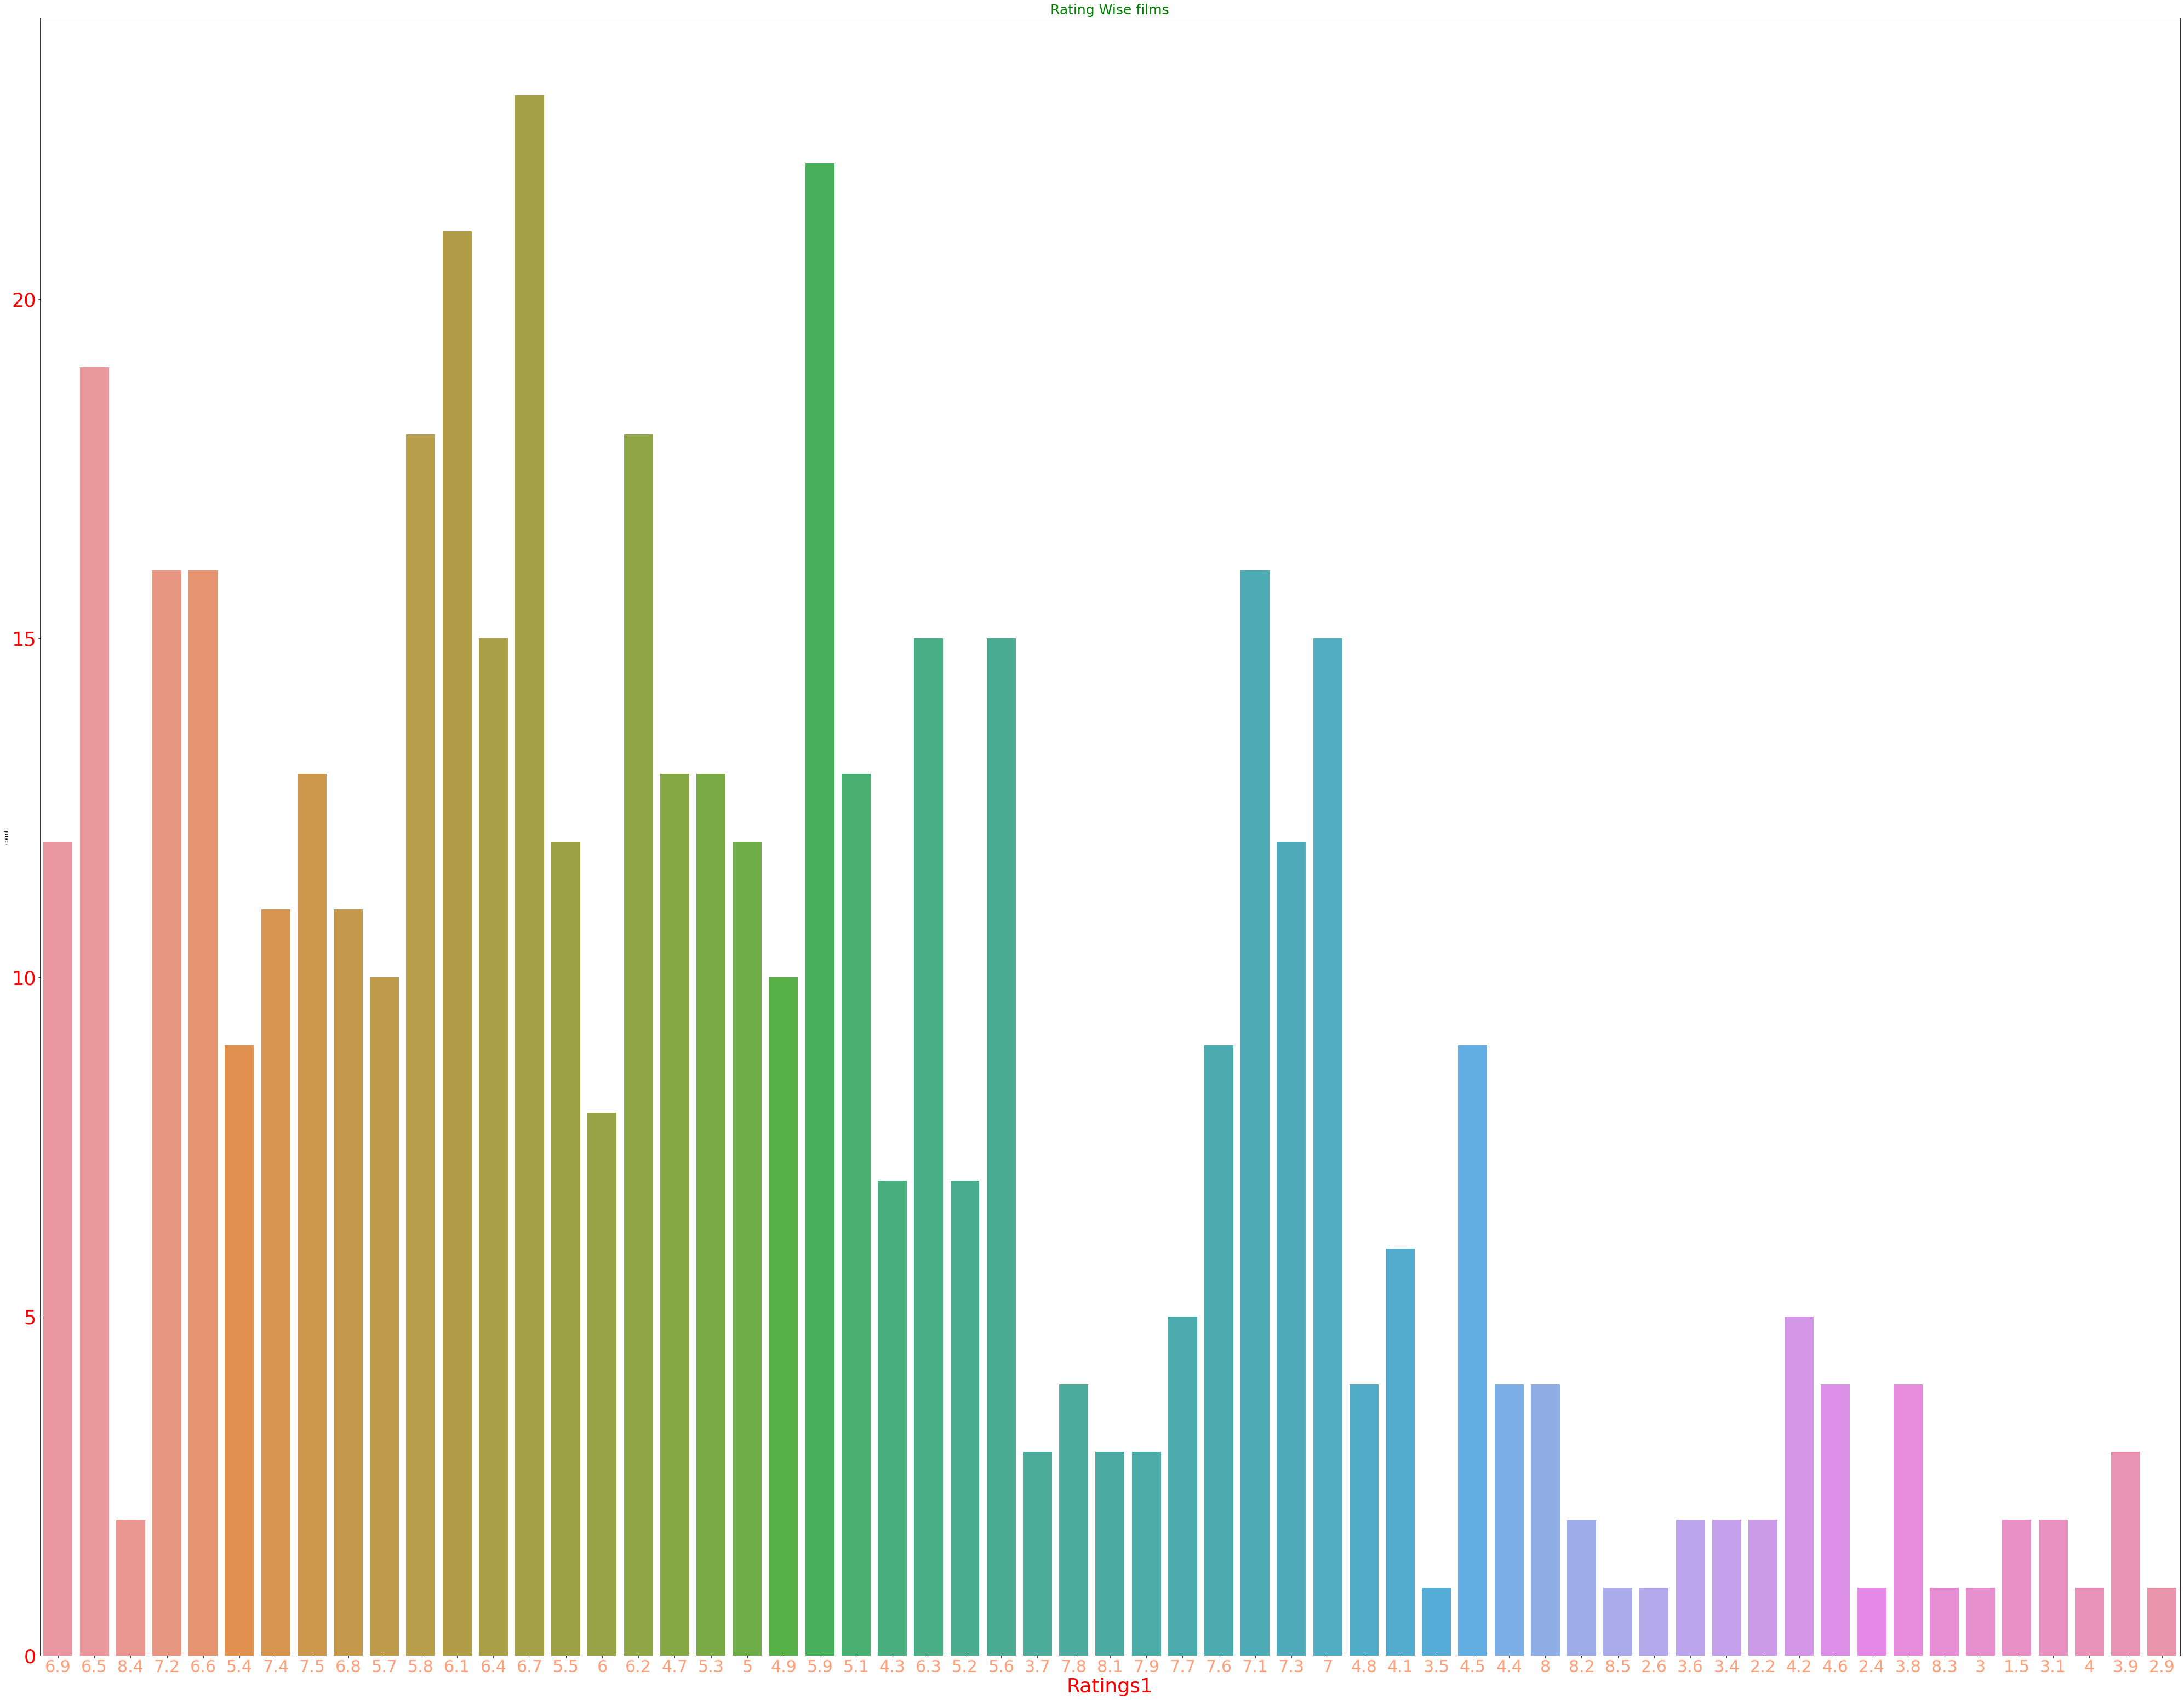

In [49]:
plt.figure(figsize=(70,55))
plt.title("Rating Wise films",color="green",fontsize=25) ## Using Count plot 
plt.xlabel("Ratings",color="red",fontsize=36)
plt.xticks(fontsize=30,color="lightsalmon")
plt.yticks(fontsize=35,color="red")
sns.countplot(x=df['Ratings1'])
plt.show()

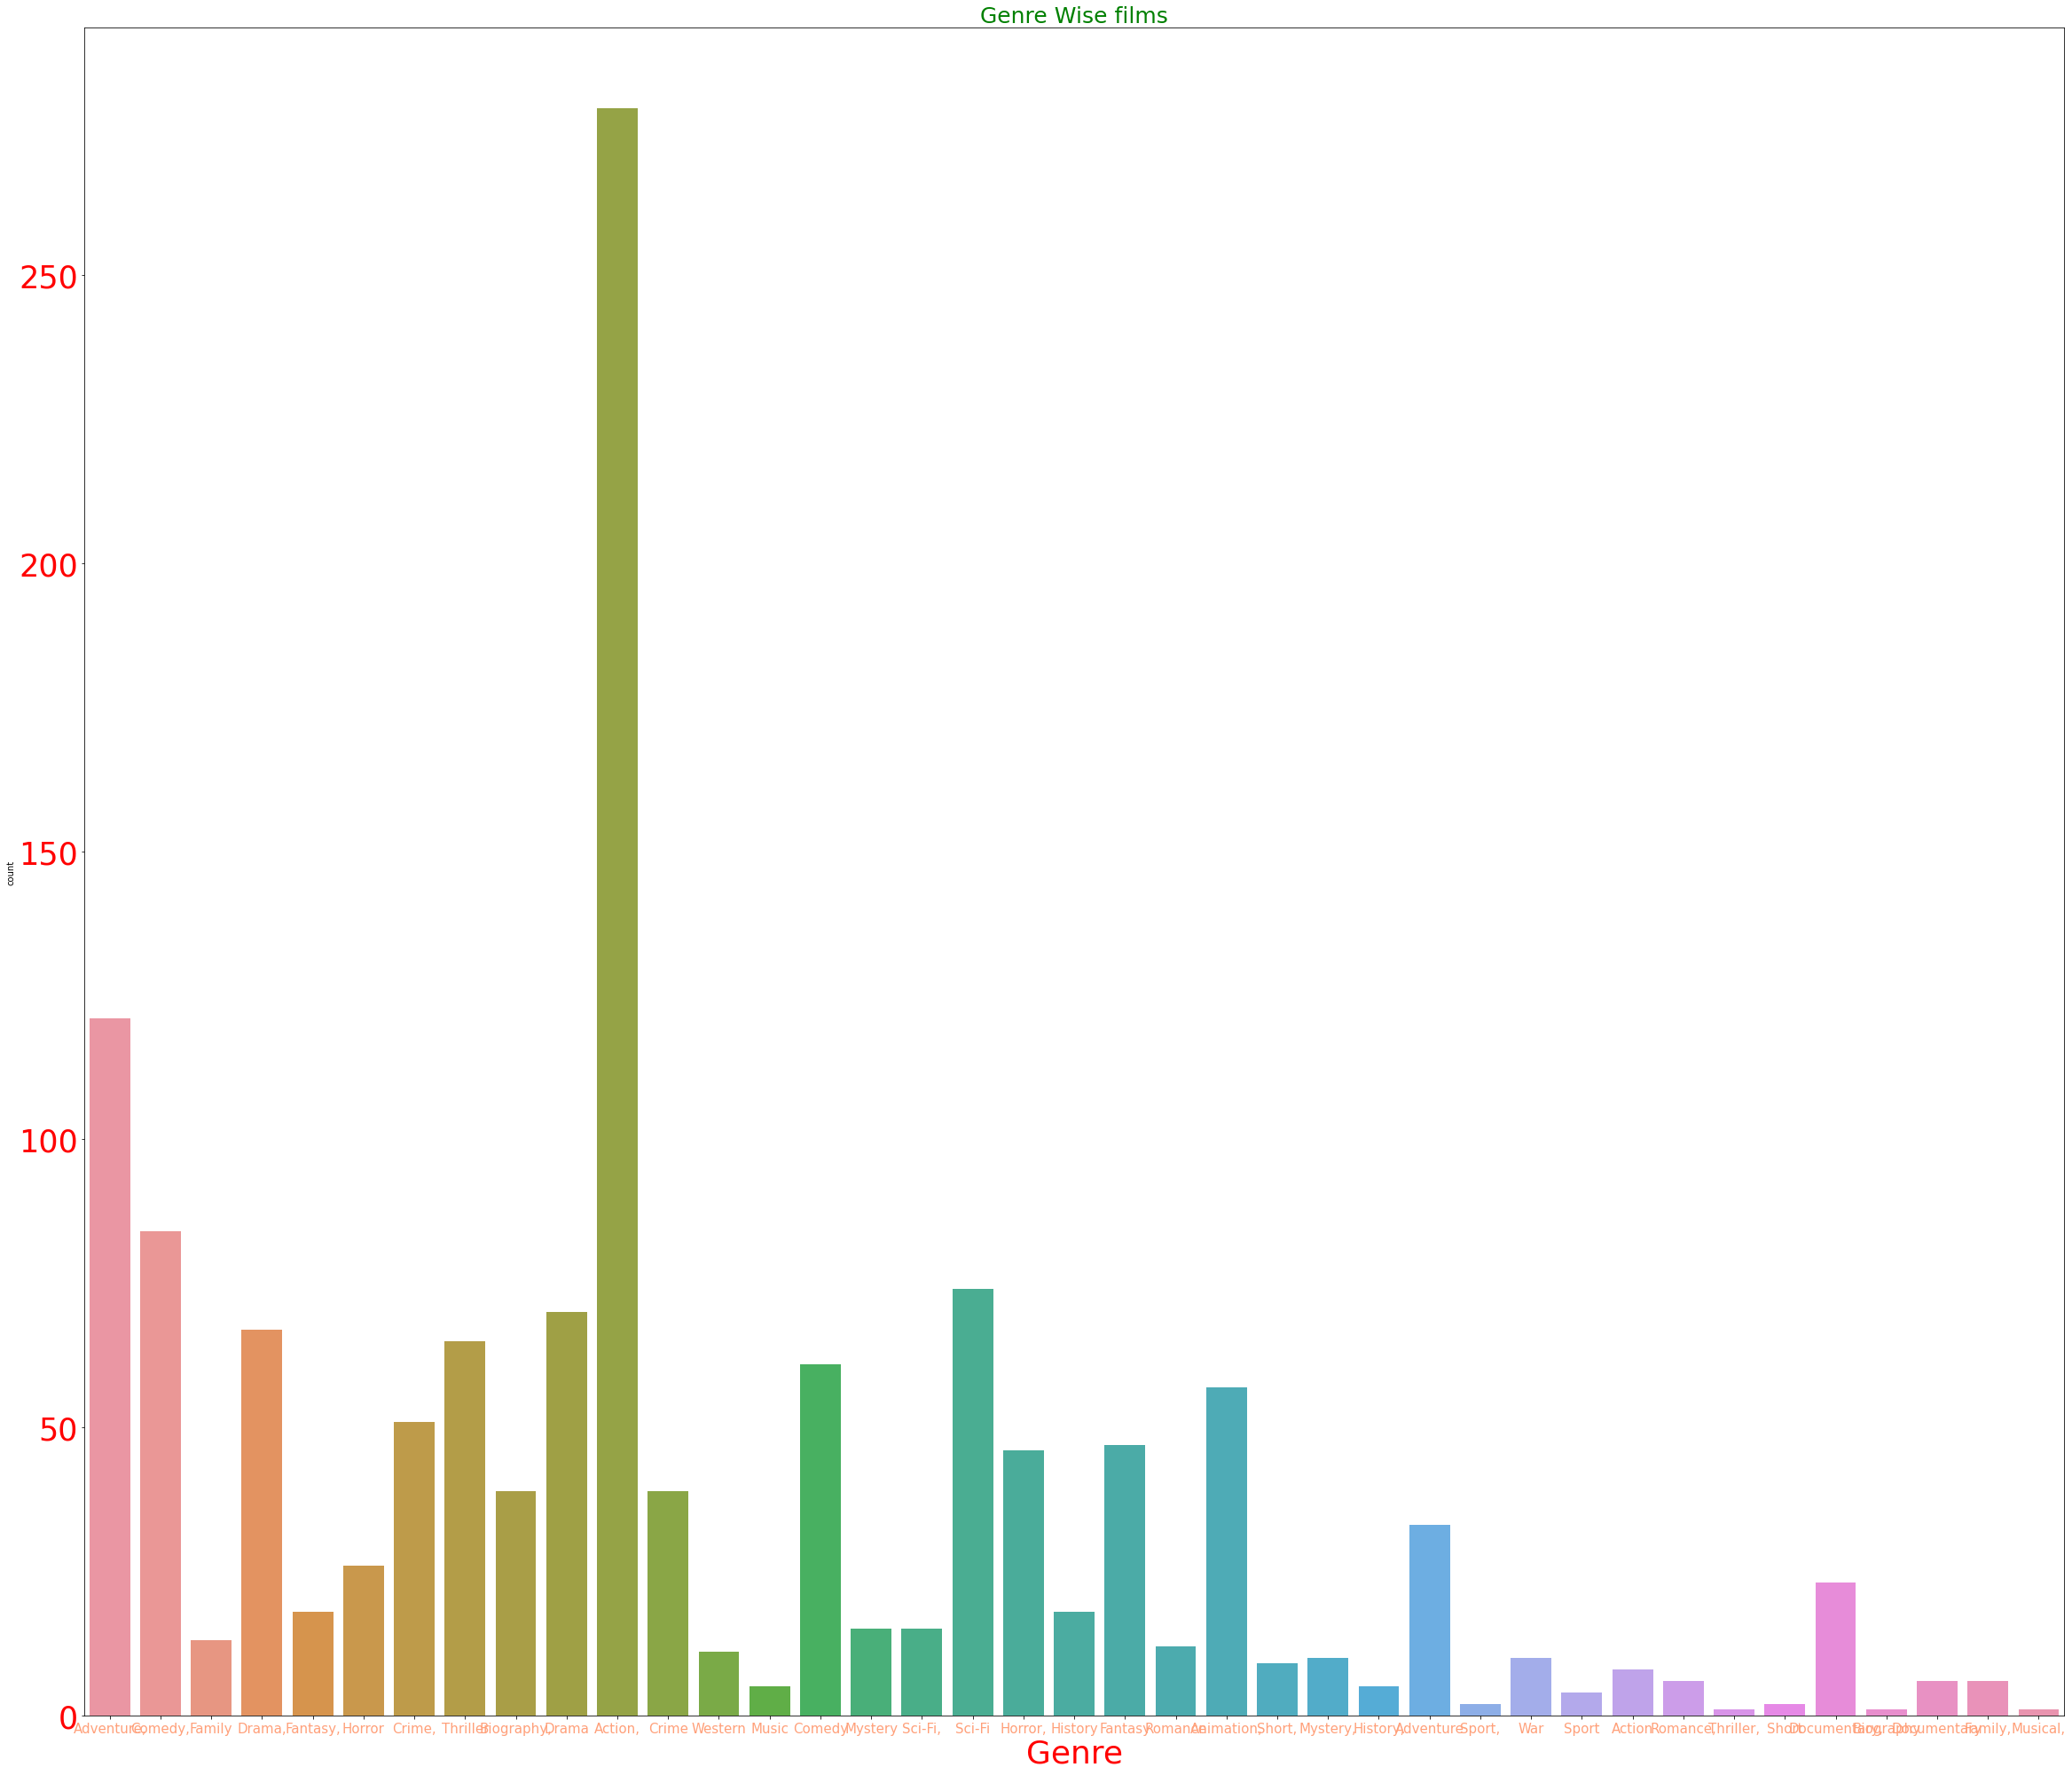

In [50]:
plt.figure(figsize=(40,35))
plt.title("Genre Wise films",color="green",fontsize=25) ## Using Count plot 
plt.xlabel("Genre",color="red",fontsize=36)
plt.xticks(fontsize=15,color="lightsalmon")
plt.yticks(fontsize=35,color="red")
sns.countplot(x=Genres)
plt.show()

In [51]:
df['Ratings1'].value_counts()

6.7    23
5.9    22
6.1    21
6.5    19
5.8    18
6.2    18
7.2    16
6.6    16
7.1    16
7      15
5.6    15
6.3    15
6.4    15
5.3    13
4.7    13
5.1    13
7.5    13
5.5    12
5      12
7.3    12
6.9    12
6.8    11
7.4    11
4.9    10
5.7    10
7.6     9
4.5     9
5.4     9
6       8
5.2     7
4.3     7
4.1     6
7.7     5
4.2     5
4.6     4
7.8     4
3.8     4
4.8     4
8       4
4.4     4
3.9     3
8.1     3
7.9     3
3.7     3
8.2     2
8.4     2
3.6     2
3.4     2
2.2     2
3.1     2
1.5     2
3       1
4       1
2.4     1
8.3     1
8.5     1
3.5     1
2.6     1
2.9     1
Name: Ratings1, dtype: int64

1) Top Rating is 8.5 and 1 Movies Rated 8.5

2) lowest Rating is 1.5 and 2 Movies Rated 1.5

3) Most movies Rated 6.7 and 5.9 23 Movies Rated Each rating 

4) 21 Movies Rated 6.1

## Deviding Positive Review And Negative Review

In [52]:
Report=[]
for i in df['Compound']:
    if i>0.1:
        Report.append('Positive Review')
    else:
        Report.append('Negative Review')
df['Report']=Report
df.head()
Final=df.to_csv('ImdbAnalysis.csv')

In [53]:
N_Count=0
P_Count=0
for i in Report:
    if i=='Positive Review':
        P_Count=P_Count+1
    else:
        N_Count=N_Count+1
print('Positive reviews',P_Count)
print('Negative REVIEWS',N_Count)
         
Report

Positive reviews 136
Negative REVIEWS 358


['Positive Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Positive Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Positive Review',
 'Negative Review',
 'Positive Review',
 'Positive Review',
 'Positive Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Positive Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Positive Review',
 'Negative Review',
 'Negative Review',
 'Positive Review',
 'Negative Review',
 'Positive Review',
 'Positive Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',
 'Positive Review',
 'Positive Review',
 'Negative Review',
 'Negative Review',
 'Negative Review',


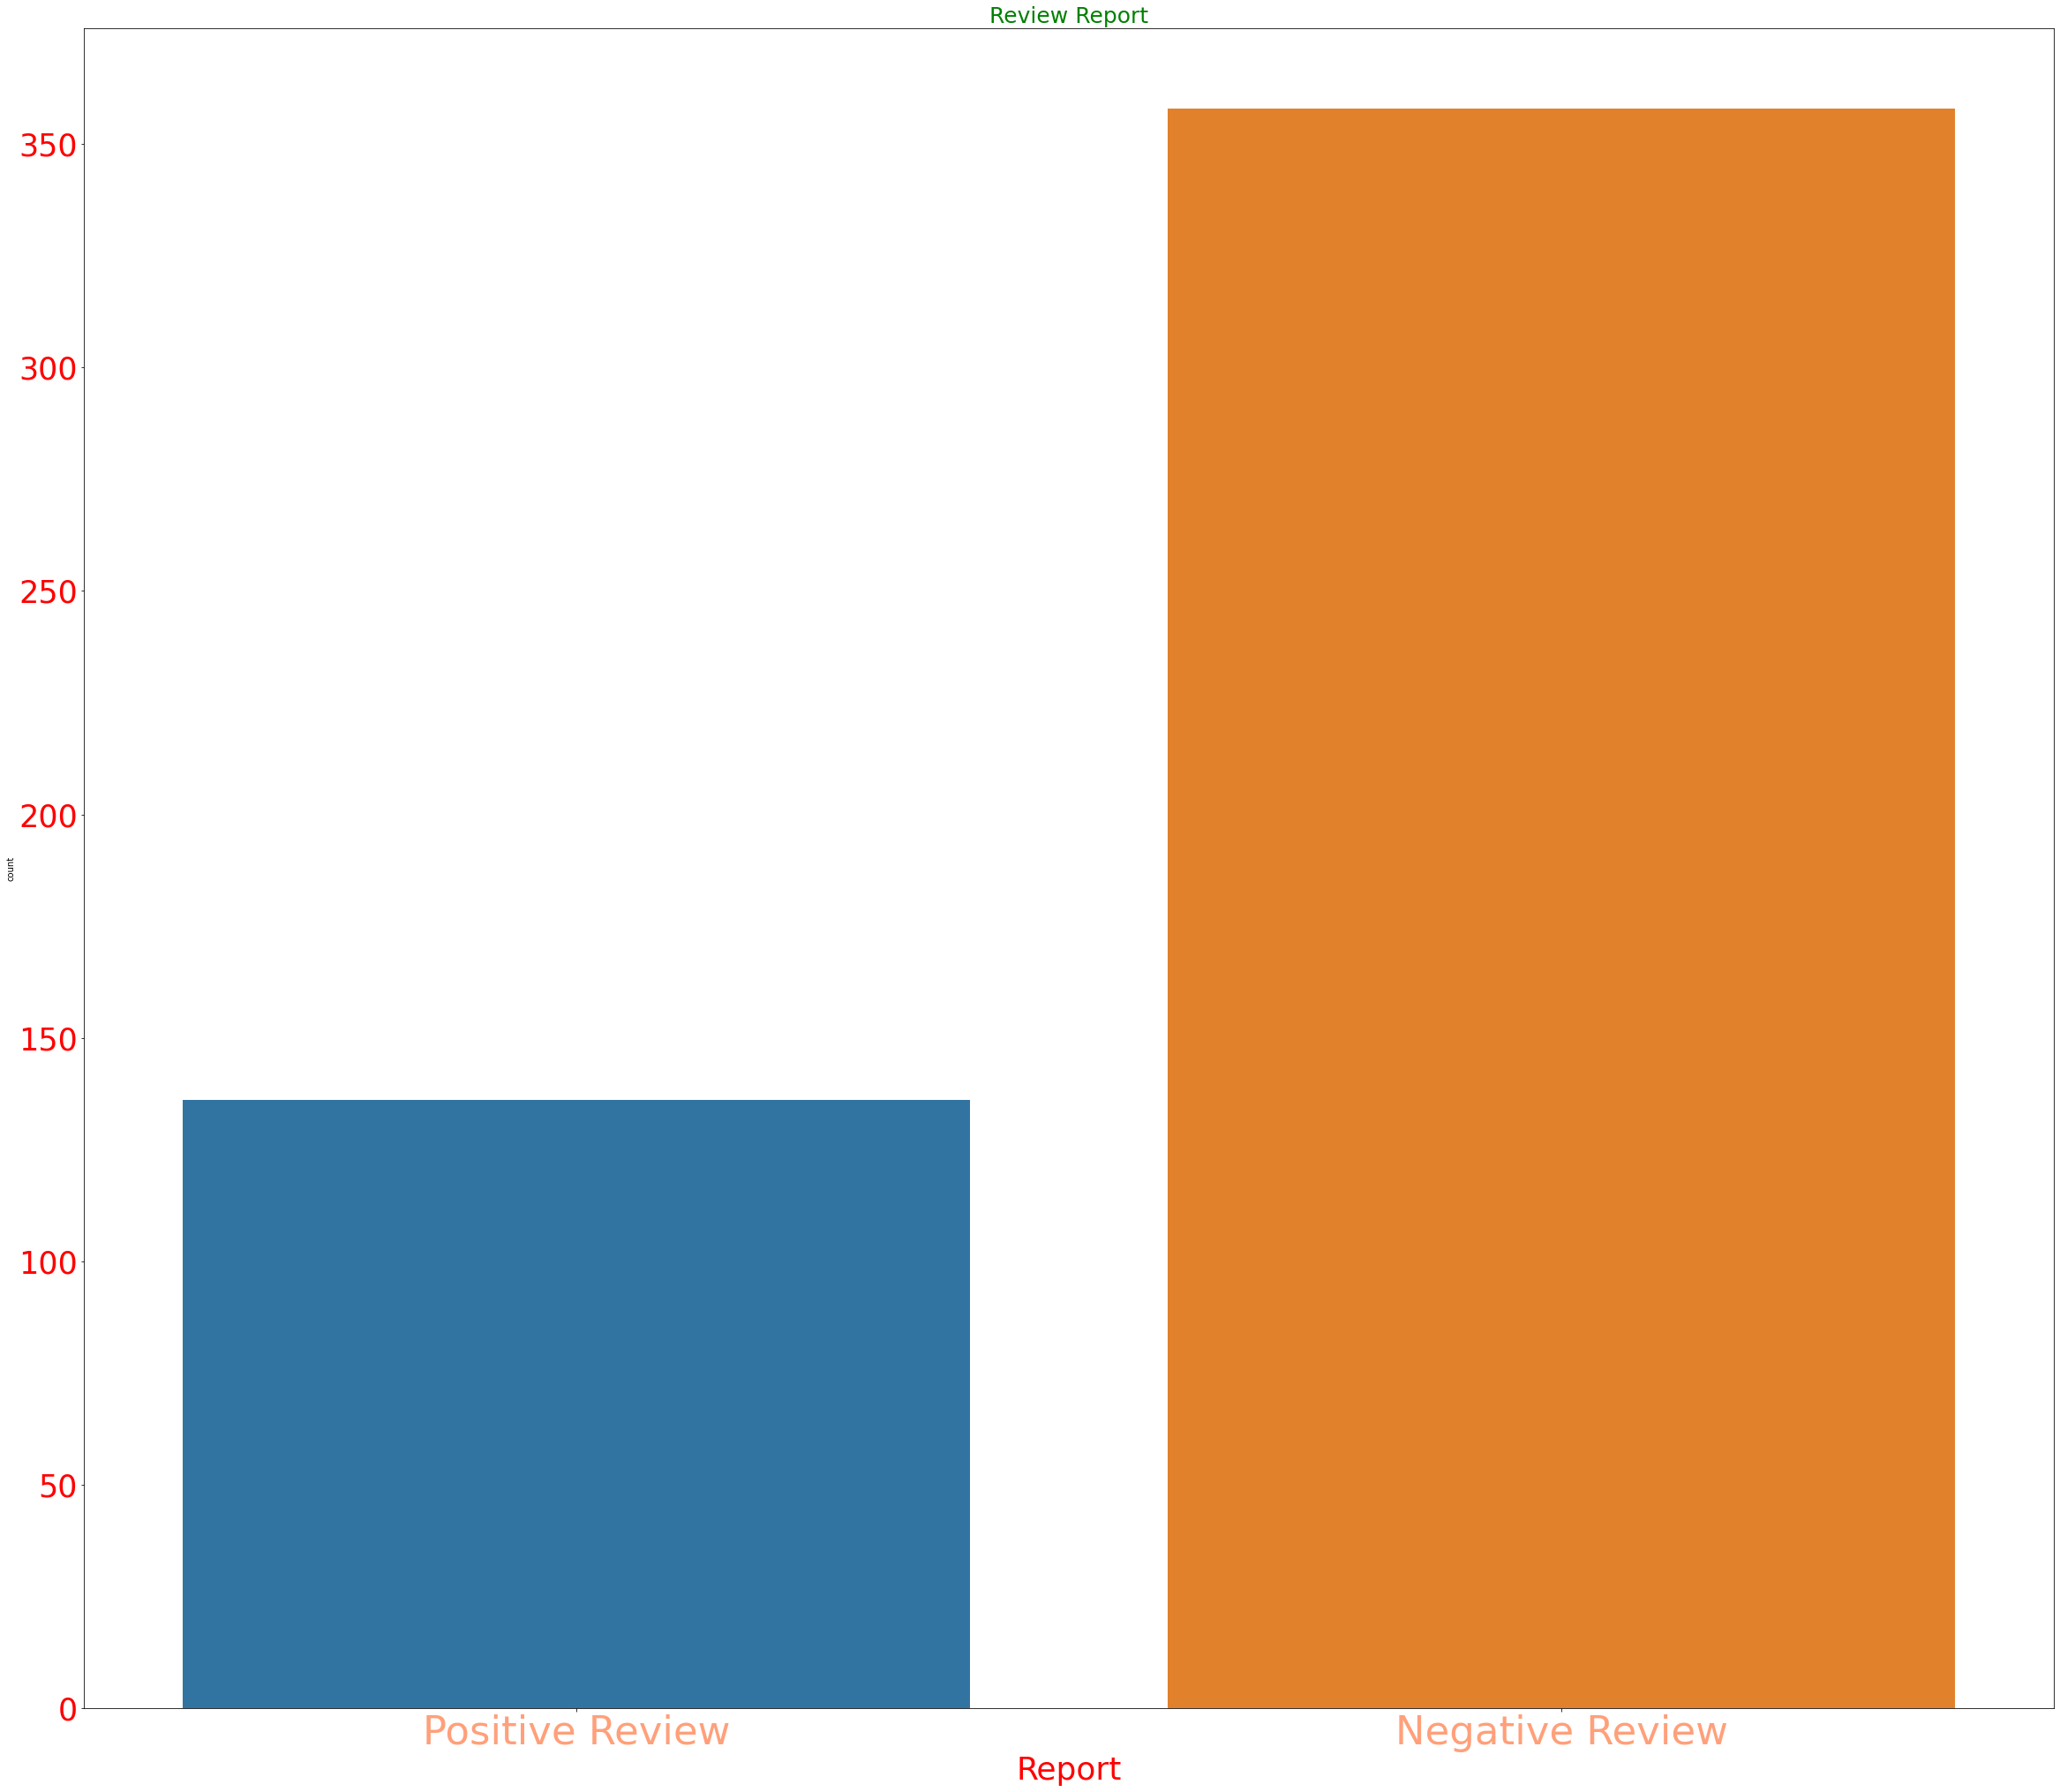

In [54]:
plt.figure(figsize=(40,35))
plt.title("Review Report",color="green",fontsize=25) ## Using Count plot 
plt.xlabel("Report",color="red",fontsize=36)
plt.xticks(fontsize=45,color="lightsalmon")
plt.yticks(fontsize=35,color="red")
sns.countplot(x=df['Report'])
plt.show()

## Conclusion
1) No of Positive Reviews = 136 

2) No of Negative Reviews = 358

3) Most Number of Films Action Genres total of 279 films and Second is Adventure of total 121 films

4) Musical,Biography and Thriller Genres are Having only One film

5) Top Rating is 8.5 and 1 Movies Rated 8.5

6) lowest Rating is 1.5 and 2 Movies Rated 1.5

7) Most movies Rated 6.7 and 5.9 23 Movies Rated Each rating 

8) 21 Movies Rated 6.1